# SciPy ile Optimizasyon

👋 [SciPy](https://scipy.org/) (`Scientific Python`) ile tanışın, güçlü bir kütüphane:
- NumPy tabanlıdır
- Python'da matematiksel işlemler için kullanılır

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

## (1) Yerel Optimizasyon

* Önceki alıştırmamızda, hedefler ile tahminler arasındaki (ortalama) karesel hataları **minimize etmenin** önemli olduğunu ve bunun için bir fonksiyonun minimumunu bulmamız gerektiğini gördük.

* Bu problem için iki yaklaşımımız var:
    1. `kapalı-form çözümler` (örneğin, matrisin tersini almak)
    2. `yinelemeli yaklaşımlar` (örneğin, gradyan inişi)

👉 [`scipy.optimize`](https://docs.scipy.org/doc/scipy/tutorial/optimize.html) modülünü kullanarak bir fonksiyonun **yerel** minimumunu nasıl bulacağımızı keşfedelim _(birkaç satır kod ile)_

In [2]:
# Import optimize
from scipy import optimize

### (1.1) 1 Boyutlu Fonksiyon

Aşağıdaki fonksiyonu ele alalım: $ f : x \rightarrow x^2 - 20 \cdot  cos(x) $

In [3]:
def f(x):
    return (x**2 - 20 * np.cos(x))

❓ Bu fonksiyonu -10 ile +10 arasında *x-ekseni* ile birlikte çiziniz ❓

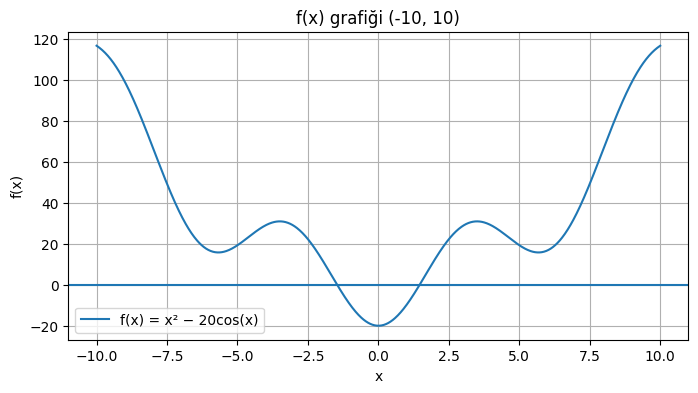

In [4]:
# YOUR CODE HERE
# x aralığı
x = np.linspace(-10, 10, 1000)
y = f(x)

# Grafik
plt.figure(figsize=(8, 4))
plt.plot(x, y, label="f(x) = x² − 20cos(x)")
plt.axhline(0)  # x-ekseni
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("f(x) grafiği (-10, 10)")
plt.legend()
plt.grid(True)

plt.show()

❓ `x0` başlangıç noktasından başlayarak `optimize.minimize()` ile $f$ fonksiyonunun **yerel minimumunu** bulmaya çalışın ❓

In [8]:
# YOUR CODE HERE
x0 = np.array([3.0])   # başlangıç noktası
result = optimize.minimize(f, x0)

result.x, result.fun # Optimizasyon algoritması, x ≈ result.x[0] noktasında fonksiyonun minimum değerinin result.fun olduğunu buldu.


(array([-1.51863314e-10]), -20.0)

In [9]:
print(result.nit)

3


❓ Belirli bir $ x_0 $ noktasından başlayarak, `optimize.minimize()`:
* `x` değişkeninde gösterilen değere yakın bir **$f$ minimumu** buldu,
* ve `scipy`'nin fonksiyonun minimumuna ulaşması için geçen iterasyon sayısını `nit` olarak verdi.

Ne sonuç çıkarabilirsiniz? ❓

❓ `x0` değerini değiştirip ne olduğunu gözlemleyin ❓

<details>
    <summary><i>Açıklamalar</i></summary>
    
💡 <code>nit</code> iterasyonundan sonra, <code>scipy.minimize()</code> fonksiyonunun algoritması, <code>x0</code> başlangıç değeri küresel minimuma (grafikte 0) yeterince yakın değilse, bir yerel minimumda <code>x</code> değerinde takılır. Bulunan yerel minimumun değeri <code>fun</code> ile okunabilir - bizim örneğimizde 15.79.
    
💡 Matematikte, bu fonksiyonun [konveks](https://en.wikipedia.org/wiki/Convex_function) olmadığını söyleriz. Eğer fonksiyon `konveks` olsaydı, herhangi bir yerel minimum aslında küresel minimum olurdu! Aslında, Makine Öğrenmesi konveks fonksiyonları sever ve bu tür problemler yinelemeli süreçlerle (ör. gradyan inişi) çok kolay çözülür!
</details>

In [10]:
def g(X):
    return -(X[1] + 47) * np.sin(np.sqrt(abs(X[0]/2 + (X[1]  + 47)))) \
        -X[0] * np.sin(np.sqrt(abs(X[0] - (X[1]  + 47))))

❓ Aşağıdaki hücreyi çalıştırarak `g` fonksiyonunu 3B olarak görselleştirin ❓

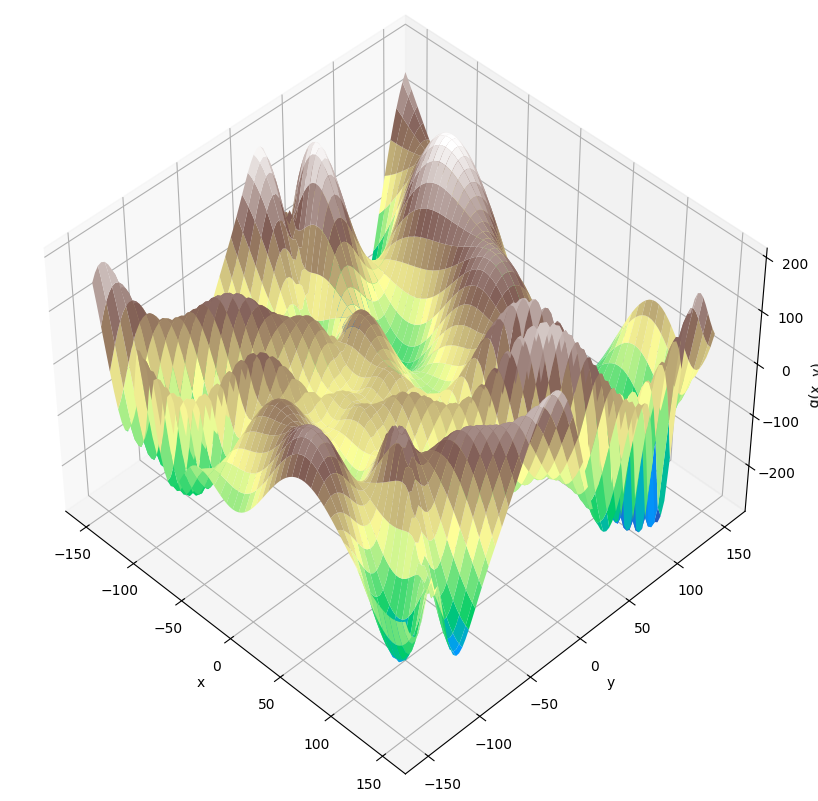

In [11]:
# Build a (50*50) meshgrid
x = np.linspace(-150,150,100) # shape(100,1)
y = np.linspace(-150,150,100) # shape(100,1)
xx, yy = np.meshgrid(x,y) # x and y of shape(100,100)
zz = np.array([xx, yy]) # (2, 100, 100)

# Compute Z, a 2D-array containing g(x,y) for each (x,y) in the meshgrid
Z = g(zz)

# Plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, Z, cmap='terrain')
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('g(x, y)'); ax.view_init(45, -45);
plt.show()

❓ Bir başlangıç noktası `X0` tanımlayın ❓

In [18]:
# YOUR CODE HERE
# coklu baslangic yaptirmak istedim cünkü birden fazla yerel minimum var gibi gözüküyor ama tek bir tane ile basliyorum.
# Başlangıç noktası (2 boyutlu)
X0 = np.array([0.0, 0.0])



❓ `optimize.minimize()` kullanarak bir `minimum` bulun ❓

In [22]:
#### Compute and store the x,y coordinates of the minimum inside a `minimum` variable
# 2 boyutlu fonksiyon
def g(X):
    x = X[0]
    y = X[1]

    return (
        -(y + 47) * np.sin(
            np.sqrt(
                np.abs(x / 2 + (y + 47))
            )
        )
        - x * np.sin(
            np.sqrt(
                np.abs(x - (y + 47))
            )
        )
    )

# Minimizasyonu çalıştır
res = optimize.minimize(g, X0)

# Minimum noktayı (x, y) olarak sakla
minimum = res.x


❓ Bu bulduğunuz değer mutlak minimum gibi görünüyor mu? Aşağıda kontrol edin ❓

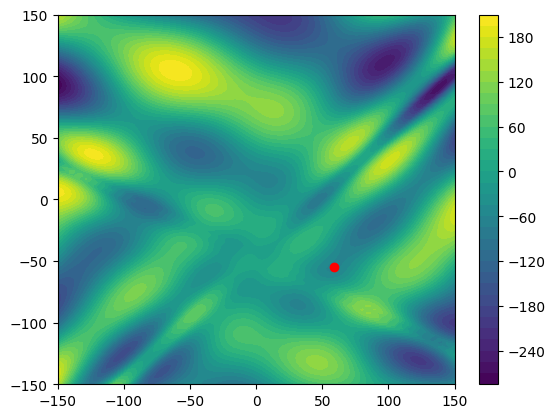

In [23]:
# Try this out

x = np.linspace(-150,150,100) # shape(100,1)
y = np.linspace(-150,150,100) # shape(100,1)
xx, yy = np.meshgrid(x,y) # x and y of shape(100,100)
zz = np.array([xx,yy]) # shape(2, 100, 100)

plt.contourf(xx,yy,g(zz), 40)
plt.colorbar()
plt.scatter(minimum[0], minimum[1], c='r')

❗️ Muhtemelen sadece $X0$ başlangıç noktasına göre **yerel** bir minimum buldunuz.

❓ **Küresel** minimumu bulma şansınızı artıracak bir yöntem düşünebilir misiniz? ❓

1) Birden fazla başlangıç noktası (Multi-start) belirlemek ve aynı optimizasyonu farklı X₀’larla tekrar tekrar çalıştırmak.
2) Basinhopping (yerel + rastgele sıçrama) : Yerel minimuma in, rastgele zıpla, daha iyi bir çukur bulursan oraya yerleş.
3) Izgara (grid) + en iyiyi seç : Izgara (grid) + en iyiyi seç.

<details>
    <summary><i>İpuçları</i></summary>

👉 Deneysel bir fikir olarak, birçok rastgele başlangıç noktası $X0$ üzerinden döngü kurup, her çalıştırmada bulunan minimum değeri saklayabilirsiniz. Her iterasyondan sonra küresel minimumu bulma şansınız artacaktır. 👈
</details>

**🧪Kodunuzu kontrol edin!**

In [24]:
from nbresult import ChallengeResult

result = ChallengeResult('minimize2d',
    X0_shape=X0.shape,
    minimum_shape=minimum.shape
)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/wit/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/wit/code/data-scipy/tests
plugins: typeguard-4.4.2, anyio-4.8.0
collecting ... collected 2 items

test_minimize2d.py::TestMinimize2d::test_minimum_shape PASSED            [ 50%]
test_minimize2d.py::TestMinimize2d::test_starting_point_shape PASSED     [100%]

============================== 2 passed in 0.06s ===============================


💯 You can commit your code:

git add tests/minimize2d.pickle

git commit -m 'Completed minimize2d step'

git push origin master



### (1.3) Kısıtlar Altında Minimizasyon 🔥

👉 Gerçek dünya problemlerinde, genellikle bir fonksiyonu $h(\textbf{x})$ **değişkenlerin kendilerine ait kısıtlar altında** minimize etmek isteriz.   

🎒 Örneğin, ünlü [Sırt Çantası Problemi](https://en.wikipedia.org/wiki/Knapsack_problem) gibi.

👩‍🏫 Matematikte çoğu zaman en zor kısım, denklemleri çözmek değil, gerçek dünya problemini matematiksel denklemlere dönüştürmektir. Ancak bu alıştırmada, aşağıdaki problem tanımının verildiğini varsayalım:

---
$\textbf{x}$ vektörünü minimize edin: $h(\textbf{x}) = x_1 x_4 (x_1 + x_2 + x_3) + x_3$  

Aşağıdaki kısıtlar altında:

$[1]\ \ x_1^2 + x_2^2 + x_3^2 + x_4^2 = 40$  (*eşitlik kısıtı*)

$[2]\ \ x_1 x_2 x_3 x_4 \leqslant 25$ (*eşitsizlik kısıtı*)

$[3]\ \ 1 \leqslant x_1, x_2, x_3, x_4 \leqslant 5$ (*sınırlar*)

---

❓ Sonraki adımlarda, ek argümanlar kullanarak `minimize` metodunu tekrar kullanacağız: 

`optimize.minimize(h, X0, constraints=cons, bounds=boundaries)`

👉 Öncelikle, minimize etmek istediğiniz hedef fonksiyon `h(X)`'i tanımlayın. `X`, uzunluğu 4 olan bir 1D dizidir.

In [ ]:
def h(X):
    pass  # YOUR CODE HERE

👉 Sonra, [1] numaralı denklemin sağlandığında `0` döndüren sürekli bir `constraint1(X)` fonksiyonu tanımlayın. Aksi halde, denklemin ne kadar sapmış olduğunu gösteren bir sayı döndürmeli.

<details>
  <summary><i>İpucu</i></summary>
  Fonksiyonun if-else yapısına ihtiyacı yoktur:
    
  Denklemi alın ve tüm terimleri bir tarafa taşıyın, böylece denklemi 0'a eşit olacak şekilde yazın.
</details>

In [ ]:
def constraint1(X):
    pass  # YOUR CODE HERE

<details>
  <summary markdown='span'><i>Çözüm</i>
  </summary>

  ```python
  return 25.0 - X[0] * X[1] * X[2] * X[3]
  ```
</details>

👉 Aynı mantıkla, [2] numaralı eşitsizliği temsil eden sürekli bir `constraint2(X)` fonksiyonu tanımlayın.

- Fonksiyon, kısıt sağlandığında ≥ 0, ihlal edildiğinde < 0 olmalı,
- Değer, uygun bölgeye girdikçe artmalı, dışına çıktıkça azalmalı.

In [ ]:
def constraint2(X):
    pass  # YOUR CODE HERE

<details>
  <summary markdown='span'><i>Çözüm</i>
  </summary>

  ```python
  return 25.0 - X[0] * X[1] * X[2] * X[3]
  ```
</details>

👉 Şimdi, fonksiyonu minimize etmek için gereken "constraint" argümanını sizin için tanımlıyoruz. [`optimize.minimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) sözdizimine dikkat edin:

In [ ]:
con1 = {"type": "eq", "fun": constraint1}
con2 = {"type": "ineq", "fun": constraint2}
constraints = [con1, con2]

❓ Şimdi [3] numaralı denklemi ele alalım.
Bunları 10 farklı kısıt fonksiyonu olarak yazabilirdik, ancak bu çok zaman alırdı.

Bunun yerine, `scipy` bize aradığımız değişkenler için aşağıdaki gibi bir "boundaries" argümanı (fonksiyona `bounds = bounds` olarak geçeceğiz) oluşturma imkanı sunar:  
`bounds` = tuple'ların tuple'ı `((x1_min, x_1_max), (x2_min, x_2_max), ....)`

👉 Bir `bounds` değişkeni oluşturun:

👉 Son olarak, minimizasyon algoritması için herhangi bir başlangıç noktası `X0` tanımlayın

❓ Şimdi, bu kısıtlar altında hedef fonksiyonunuz `h`'nin minimumunu `optimize.minimize` ile bulmayı deneyin ❓

In [ ]:
# Minimize under constraints


👉 Minimumu veren (4-boyutlu) girdileri bir `local_minimum` değişkenine kaydedin

👉 Kısıtların sağlandığını kontrol edin, örneğin birinci kısıtı.

In [ ]:
# Check constraints


**🧪Kodunuzu kontrol edin!**

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('minimize_constraints',
    bounds=bounds,
    X0=X0,
    Xmin=local_minimum
)
result.write()
print(result.check())

## (2) Küresel Optimizasyon

Daha önce tartışıldığı gibi, `optimize.minimize` yalnızca **X0 çevresindeki yerel minimumları** bulur. **Küresel** minimumu bulmak için temelde iki seçeneğiniz vardır:

<u> Seçenek 1</u>: **Matematik meraklıları için** 🤓

Optimizasyon probleminizin geometrik olarak [konveks](https://en.wikipedia.org/wiki/Convex_function) olduğunu matematiksel olarak kanıtlayın. Bir optimizasyon problemi aşağıdaki durumlarda konvekstir:
1. Amaç fonksiyonu `h` konveks ise,
2. Eşitsizlik kısıtları konveks ise,
3. Eşitlik kısıtları doğrusalsa.
    
📚 Daha fazla bilgi için Berkeley'den bu sunuma göz atabilirsiniz: [Makine Öğrenmesi için Konveks Optimizasyon](https://people.eecs.berkeley.edu/~jordan/courses/294-fall09/lectures/optimization/slides.pdf)

<u>Seçenek 2</u>: **Pragmatik kişiler için** 😁

- Birçok farklı başlangıç noktası $X0$ üzerinden döngü kurun ve yakınındaki yerel minimumları arayın.
- Her çalıştırmada bulunan minimum değeri saklayın.
- Her iterasyondan sonra küresel minimumu bulma şansınız artar.

----

💡 <u>Seçenek 2</u> aslında aşağıdaki Scipy kütüphanelerinin yaptığı şeydir: parametre uzayını _verimli_ bir şekilde tarar ve her iterasyonda `minimize` kullanır. Aranacak parametre sayısı az olduğunda daha iyi çalışır ([`scipy.optimize.shgo`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.shgo.html#scipy.optimize.shgo) veya [`scipy.optimize.dual_annealing`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.dual_annealing.html))

❗️ Ancak, bu yöntemler yalnızca parametreler için **belirtilen sınırlar içinde** "küresel" minimum döndürür

❓ Önceki 2B fonksiyonumuz $g(x,y)$ için -150 ile +150 arasında sınırlanmış küresel minimumları bulmak için bu iki fonksiyonu kullanmayı deneyin ❓

In [ ]:
# Sınırları tanımayan bir `bounds` değişkeni oluşturun

In [ ]:
# `optimize.shgo` metodu ile küresel minimum `minimum_shgo` hesaplayın

In [ ]:
# Try this out

x = np.linspace(-150,150,100) # shape(100,1)
y = np.linspace(-150,150,100) # shape(100,1)
xx, yy = np.meshgrid(x,y) # x and y of shape(100,100)
zz = np.array([xx,yy]) # shape(2, 100, 100)

plt.contourf(xx,yy,g(zz), 40)
plt.colorbar()
plt.scatter(minimum_shgo[0], minimum_shgo[1], c='r')

In [ ]:
# `optimize.dual_annealing` metodu ile küresel minimum `minimum_dual` hesaplayın

In [ ]:
# Try this out

x = np.linspace(-150,150,100) # shape(100,1)
y = np.linspace(-150,150,100) # shape(100,1)
xx, yy = np.meshgrid(x,y) # x and y of shape(100,100)
zz = np.array([xx,yy]) # shape(2, 100, 100)

plt.contourf(xx,yy,g(zz), 40)
plt.colorbar()
plt.scatter(minimum_dual[0], minimum_dual[1], c='r')

**🧪Kodunuzu kontrol edin!**

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('global_optimization',
    bounds=bounds,
    Xmin_shgo=minimum_shgo,
    Xmin_dual=minimum_dual
)
result.write()
print(result.check())

## (3) Yaklaşımlar

### (3.1) Saçılım Grafiğini Uydurmak

🧑🏻‍🏫 İki nicel değişken X ve Y arasındaki ilişkiyi analiz etmenin ilk adımı onları **saçılım grafiği** olarak göstermektir.

🤔 Ardından soru şu olur: X ve Y arasında hangi ilişki var? Saçılım grafiğini düz bir çizgiyle uydurabiliriz? Hayırsa, X ve Y arasındaki ilişkiyi bir polinom eğrisi mi? logaritmik eğri mi? ile yaklaşıklaştırabiliriz?

Çoğunlukla saçılım grafiğini düz bir çizgiyle uydurmamız gerekir, ancak bunun polinom, logaritmik vb. gibi başka şeyler de olabileceği durumlar vardır.

❓ Aşağıdaki veri seti için doğrusal regresyon eğrisi uydurmayı deneyer misiniz? ❓

In [ ]:
x = np.array([-3.        , -2.87755102, -2.75510204, -2.63265306, -2.51020408,
       -2.3877551 , -2.26530612, -2.14285714, -2.02040816, -1.89795918,
       -1.7755102 , -1.65306122, -1.53061224, -1.40816327, -1.28571429,
       -1.16326531, -1.04081633, -0.91836735, -0.79591837, -0.67346939,
       -0.55102041, -0.42857143, -0.30612245, -0.18367347, -0.06122449,
        0.06122449,  0.18367347,  0.30612245,  0.42857143,  0.55102041,
        0.67346939,  0.79591837,  0.91836735,  1.04081633,  1.16326531,
        1.28571429,  1.40816327,  1.53061224,  1.65306122,  1.7755102 ,
        1.89795918,  2.02040816,  2.14285714,  2.26530612,  2.3877551 ,
        2.51020408,  2.63265306,  2.75510204,  2.87755102,  3.        ])
y = np.array([31.66815357, 31.26229494, 30.3467807 , 28.2057809 , 25.47674964,
       22.81398414, 19.93953021, 19.38250362, 20.02551935, 17.44468883,
       17.80733403, 16.29808282, 14.85006259, 12.69760597, 13.04075803,
       10.42420089,  7.91118094,  9.72737214,  9.05962483,  6.89984054,
        8.15068899,  5.15772899,  7.65448235,  4.95987628,  4.4284636 ,
        3.22183541,  3.05456124,  3.49253584,  2.23478284,  4.15163314,
        3.68063488,  5.22556445,  2.47139029,  2.66785497,  3.72557952,
        2.56255802,  4.61385762,  4.28234911,  4.91138639,  5.31724926,
        6.52053679,  5.94175001,  7.5368359 ,  9.78905172,  9.5795072 ,
       10.95610291, 11.73051576, 12.85008617, 12.2184079 , 16.52977769])
plt.scatter(x,y)

👉 Bu durumda, **2. derece polinom tahmincisi** ( $ Y = a X^2 + b X + c) $ basit bir düz çizgiden (1. derece polinom tahmincisi: $ Y = a X + b $) daha uygun görülmektedir.

❓ $ \large (a,b,c) $ parametreleriyle $\large f$ fonksiyonunu 2. dereceden tanımlayın ❓

In [ ]:
def f(x,a,b,c):
    pass  # YOUR CODE HERE

🎯 Bu saçılım grafiğini yaklaşıklaştırmak için 2. derece polinom fonksiyonunu kullanacağız. Bu nedenle **en iyi parametreleri $(a,b,c)$ bulmanız** gerekiyor.

❌ `optimize.minimize` metodunu tekrar kullanarak tahmincimiz $f$ ile saçılım grafiğimiz arasındaki Ortalama Karesel Hataları minimize etmek isteyebilirdik ama...

✅ Neyse ki, [`optimize.curve_fit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) bu optimizasyon sürecini sadece bir satır kod ile bizim için yapıyor!

In [ ]:
# Deneyin
optimize.curve_fit(f, x, y)

* İlk dizi, $f$ ve veri seti arasındaki karesel hataları minimize etmek için hesaplanan $(a,b,c)$ katsayılarını içerir.

❓ Uyduğunu kontrol etmek için ikinci derece tahmincisini saçılım grafiğinin üzerine çizin! ❓

In [ ]:
pass  # YOUR CODE HERE

## (3.2) Enterpolasyon

🚀 Herhangi bir spreadsheet yazılımında olduğu gibi, genellikle bir dizi veri noktasındaki boşlukları hızlı bir şekilde doldurmak isteriz. [`scipy.interpolate`](https://docs.scipy.org/doc/scipy/reference/interpolate.html) kullanacağız

In [ ]:
from scipy import interpolate

👇 Aşağıdaki saçılım grafiğini düşünün:

In [ ]:
x = np.linspace(0, 10, 10)
y = np.array([ 0.        ,  0.8961922 ,  0.79522006, -0.19056796, -0.96431712,
       -0.66510151,  0.37415123,  0.99709789,  0.51060568, -0.54402111])
plt.scatter(x, y)

💡 Bu aralıktaki herhangi bir $x$ değerinin görüntüsünü hesaplayan sürekli bir fonksiyon oluşturmak için [`interpolate.interp1d()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html) metodunu kullanabiliriz

In [ ]:
f_interpolated = interpolate.interp1d(x,y, kind='linear')
f_interpolated

❓ Şimdi, bu aralıktaki $x$ için herhangi bir sürekli değerle enterpolasyonlanmış fonksiyonunuzu çağırabilirsiniz. Yeni bir çizim ve yoğun bir `linspace` ile $x$ için görselleştirin. `quadratic` veya `cubic` gibi diğer `kind` enterpolasyonlarını denemekten çekinmeyin ❓

In [ ]:
# YOUR CODE HERE